# EPL 데이터 분석 

- 왜 맨유는 우승을 못하는가?

1. 맨체스터 유나이티드에 대해서 알아보자

2. 우승팀들의 승점

3. 강등팀들의 승점

4. 우승하는팀들의 공통점

1) 공격
- 득점 , 슈팅, 유효슈팅

2) 수비
- 실점, 파울, 카드 수 

5. 결론


데이터 : 
kaggle https://www.kaggle.com/irkaal/english-premier-league-results 
EPL 93년 ~ 21년 4월 5일까지의 경기 기록 데이터 

In [153]:
# 필요 라이브러리 등록 및 csv 파일 읽기
import pandas as pd
EPL_data = pd.read_csv("./data/results.csv",sep=',',encoding='cp949')

In [154]:
EPL_data.tail()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
11108,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,...,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,...,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,...,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,...,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0
11112,2021-22,2022-04-10T16:30:00Z,Man City,Liverpool,2,2,D,2.0,1.0,H,...,5.0,4.0,4.0,1.0,9.0,11.0,1.0,4.0,0.0,0.0


In [155]:
EPL_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    11113 non-null  object 
 1   DateTime  11113 non-null  object 
 2   HomeTeam  11113 non-null  object 
 3   AwayTeam  11113 non-null  object 
 4   FTHG      11113 non-null  int64  
 5   FTAG      11113 non-null  int64  
 6   FTR       11113 non-null  object 
 7   HTHG      10189 non-null  float64
 8   HTAG      10189 non-null  float64
 9   HTR       10189 non-null  object 
 10  Referee   8289 non-null   object 
 11  HS        8289 non-null   float64
 12  AS        8289 non-null   float64
 13  HST       8289 non-null   float64
 14  AST       8289 non-null   float64
 15  HC        8289 non-null   float64
 16  AC        8289 non-null   float64
 17  HF        8289 non-null   float64
 18  AF        8289 non-null   float64
 19  HY        8289 non-null   float64
 20  AY        8289 non-null   fl

In [156]:
# 결측치 삭제 후 새로운 DF 생성
EPL_data.dropna(axis=0)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
2824,2000-01,2000-08-19T00:00:00Z,Charlton,Man City,4,0,H,2.0,0.0,H,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
2825,2000-01,2000-08-19T00:00:00Z,Chelsea,West Ham,4,2,H,1.0,0.0,H,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2826,2000-01,2000-08-19T00:00:00Z,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
2827,2000-01,2000-08-19T00:00:00Z,Derby,Southampton,2,2,D,1.0,2.0,A,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
2828,2000-01,2000-08-19T00:00:00Z,Leeds,Everton,2,0,H,2.0,0.0,H,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,...,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,...,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,...,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,...,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0


----
순위 정리

In [157]:
# 시즌 list
season=list(EPL_data['Season'].unique())

In [158]:
for count,i in enumerate(season,1994):
    rank = {}  
    s=EPL_data.loc[EPL_data['Season']==i,:] # 시즌별로 추출
    
    for j in s.index:
        if s['FTR'][j]=='H': # 홈팀 승리
            if s['HomeTeam'][j] in rank: # 딕셔너리 안에 있으면 추가
                rank[s['HomeTeam'][j]] = rank[s['HomeTeam'][j]]+ 3
            else:
                rank[s['HomeTeam'][j]] = 3
        elif s['FTR'][j]=='D': # 동점 
            if s['HomeTeam'][j] in rank: # 딕셔너리 안에 있으면 추가
                rank[s['HomeTeam'][j]] = rank[s['HomeTeam'][j]]+ 1
            else:
                rank[s['HomeTeam'][j]] = 1
            if s['AwayTeam'][j] in rank: # 딕셔너리 안에 있으면 추가
                rank[s['AwayTeam'][j]] = rank[s['AwayTeam'][j]]+ 1
            else:
                rank[s['AwayTeam'][j]] = 1
        else: # 어웨이팀 승리 
            if s['AwayTeam'][j] in rank: # 딕셔너리 안에 있으면 추가
                rank[s['AwayTeam'][j]] = rank[s['AwayTeam'][j]]+ 3
            else:
                rank[s['AwayTeam'][j]] = 3
    
    df = pd.DataFrame(list(rank.items()), columns=['TEAM', 'Point'])   
    df=df.sort_values(by='Point',ascending=False)
    df= df.reset_index(drop=True)
    df.index = df.index + 1
    df["season"] = count
    
    globals()["s_"+str(count)] = df

In [159]:
total=pd.concat([s_1994,s_1995,s_1996,s_1997,s_1998,s_1999,s_2000,s_2001,s_2002,s_2003,s_2004,s_2005,s_2006,s_2007,s_2008,s_2009,s_2010,s_2011,s_2012,s_2013,s_2014,s_2015,s_2016,s_2017,s_2018,s_2019,s_2020,], axis=1)

In [160]:
# 5년 단위로 끊어서 DF 연결 확인
pd.concat([s_1994,s_1995,s_1996,s_1997,s_1998], axis=1)

,TEAM,Point,season,TEAM,Point,season,TEAM,Point,season,TEAM,Point,season,TEAM,Point,season
1,Man United,92,1994,Blackburn,89,1995,Man United,82.0,1996.0,Man United,75.0,1997.0,Arsenal,78.0,1998.0
2,Blackburn,84,1994,Man United,88,1995,Newcastle,78.0,1996.0,Arsenal,68.0,1997.0,Man United,77.0,1998.0
3,Newcastle,77,1994,Nott'm Forest,77,1995,Liverpool,71.0,1996.0,Liverpool,68.0,1997.0,Liverpool,65.0,1998.0
4,Arsenal,71,1994,Liverpool,74,1995,Aston Villa,63.0,1996.0,Newcastle,68.0,1997.0,Chelsea,63.0,1998.0
5,Leeds,70,1994,Leeds,73,1995,Arsenal,63.0,1996.0,Aston Villa,61.0,1997.0,Leeds,59.0,1998.0
6,Wimbledon,65,1994,Newcastle,72,1995,Everton,61.0,1996.0,Chelsea,59.0,1997.0,Blackburn,58.0,1998.0
7,Sheffield Weds,64,1994,Tottenham,62,1995,Tottenham,61.0,1996.0,Sheffield Weds,57.0,1997.0,Aston Villa,57.0,1998.0
8,Liverpool,60,1994,QPR,60,1995,Blackburn,61.0,1996.0,Wimbledon,56.0,1997.0,West Ham,56.0,1998.0
9,QPR,60,1994,Wimbledon,56,1995,Nott'm Forest,58.0,1996.0,Leicester,47.0,1997.0,Derby,55.0,1998.0
10,Aston Villa,57,1994,Southampton,54,1995,West Ham,51.0,1996.0,Tottenham,46.0,1997.0,Leicester,53.0,1998.0


In [161]:
# 5년 단위로 끊어서 DF 연결 확인
pd.concat([s_1999,s_2000,s_2001,s_2002,s_2003], axis=1)

,TEAM,Point,season,TEAM,Point,season,TEAM,Point,season,TEAM,Point,season,TEAM,Point,season
1,Man United,79,1999,Man United,91,2000,Man United,80,2001,Arsenal,87,2002,Man United,83,2003
2,Arsenal,78,1999,Arsenal,73,2000,Arsenal,70,2001,Liverpool,80,2002,Arsenal,78,2003
3,Chelsea,75,1999,Leeds,69,2000,Liverpool,69,2001,Man United,77,2002,Newcastle,69,2003
4,Leeds,67,1999,Liverpool,67,2000,Leeds,68,2001,Newcastle,71,2002,Chelsea,67,2003
5,West Ham,57,1999,Chelsea,65,2000,Ipswich,66,2001,Leeds,66,2002,Liverpool,64,2003
6,Aston Villa,55,1999,Sunderland,58,2000,Chelsea,61,2001,Chelsea,64,2002,Blackburn,60,2003
7,Liverpool,54,1999,Aston Villa,58,2000,Sunderland,57,2001,West Ham,53,2002,Everton,59,2003
8,Derby,52,1999,Leicester,55,2000,Aston Villa,54,2001,Tottenham,50,2002,Southampton,52,2003
9,Middlesbrough,51,1999,West Ham,55,2000,Charlton,52,2001,Aston Villa,50,2002,Man City,51,2003
10,Leicester,49,1999,Tottenham,53,2000,Southampton,52,2001,Blackburn,46,2002,Tottenham,50,2003


In [162]:
# 5년 단위로 끊어서 DF 연결 확인
pd.concat([s_2004,s_2005,s_2006,s_2007,s_2008], axis=1)

,TEAM,Point,season,TEAM,Point,season,TEAM,Point,season,TEAM,Point,season,TEAM,Point,season
1,Arsenal,90,2004,Chelsea,95,2005,Chelsea,91,2006,Man United,89,2007,Man United,87,2008
2,Chelsea,79,2004,Arsenal,83,2005,Man United,83,2006,Chelsea,83,2007,Chelsea,85,2008
3,Man United,75,2004,Man United,77,2005,Liverpool,82,2006,Liverpool,68,2007,Arsenal,83,2008
4,Liverpool,60,2004,Everton,61,2005,Arsenal,67,2006,Arsenal,68,2007,Liverpool,76,2008
5,Aston Villa,56,2004,Bolton,58,2005,Tottenham,65,2006,Tottenham,60,2007,Everton,65,2008
6,Newcastle,56,2004,Liverpool,58,2005,Blackburn,63,2006,Everton,58,2007,Aston Villa,60,2008
7,Bolton,53,2004,Middlesbrough,55,2005,Newcastle,58,2006,Bolton,56,2007,Blackburn,58,2008
8,Charlton,53,2004,Man City,52,2005,Bolton,56,2006,Reading,55,2007,Portsmouth,57,2008
9,Fulham,52,2004,Tottenham,52,2005,West Ham,55,2006,Portsmouth,54,2007,Man City,55,2008
10,Birmingham,50,2004,Aston Villa,47,2005,Wigan,51,2006,Blackburn,52,2007,West Ham,49,2008


In [163]:
# 5년 단위로 끊어서 DF 연결 확인
pd.concat([s_2009,s_2010,s_2011,s_2012,s_2013], axis=1)

,TEAM,Point,season,TEAM,Point,season,TEAM,Point,season,TEAM,Point,season,TEAM,Point,season
1,Man United,90,2009,Chelsea,86,2010,Man United,80,2011,Man United,89,2012,Man United,89,2013
2,Liverpool,86,2009,Man United,85,2010,Chelsea,71,2011,Man City,89,2012,Man City,78,2013
3,Chelsea,83,2009,Arsenal,75,2010,Man City,71,2011,Arsenal,70,2012,Chelsea,75,2013
4,Arsenal,72,2009,Tottenham,70,2010,Arsenal,68,2011,Tottenham,69,2012,Arsenal,73,2013
5,Everton,63,2009,Man City,67,2010,Tottenham,62,2011,Newcastle,65,2012,Tottenham,72,2013
6,Aston Villa,62,2009,Aston Villa,64,2010,Liverpool,58,2011,Chelsea,64,2012,Everton,63,2013
7,Fulham,53,2009,Liverpool,63,2010,Everton,54,2011,Everton,56,2012,Liverpool,61,2013
8,Tottenham,51,2009,Everton,61,2010,Fulham,49,2011,Liverpool,52,2012,West Brom,49,2013
9,West Ham,51,2009,Birmingham,50,2010,Aston Villa,48,2011,Fulham,52,2012,Swansea,46,2013
10,Man City,50,2009,Blackburn,50,2010,Sunderland,47,2011,West Brom,47,2012,West Ham,46,2013


In [164]:
# 5년 단위로 끊어서 DF 연결 확인
pd.concat([s_2014,s_2015,s_2016,s_2017,s_2018], axis=1)

,TEAM,Point,season,TEAM,Point,season,TEAM,Point,season,TEAM,Point,season,TEAM,Point,season
1,Man City,86,2014,Chelsea,87,2015,Leicester,81,2016,Chelsea,93,2017,Man City,100,2018
2,Liverpool,84,2014,Man City,79,2015,Arsenal,71,2016,Tottenham,86,2017,Man United,81,2018
3,Chelsea,82,2014,Arsenal,75,2015,Tottenham,70,2016,Man City,78,2017,Tottenham,77,2018
4,Arsenal,79,2014,Man United,70,2015,Man United,66,2016,Liverpool,76,2017,Liverpool,75,2018
5,Everton,72,2014,Tottenham,64,2015,Man City,66,2016,Arsenal,75,2017,Chelsea,70,2018
6,Tottenham,69,2014,Liverpool,62,2015,Southampton,63,2016,Man United,69,2017,Arsenal,63,2018
7,Man United,64,2014,Southampton,60,2015,West Ham,62,2016,Everton,61,2017,Burnley,54,2018
8,Southampton,56,2014,Swansea,56,2015,Liverpool,60,2016,Bournemouth,46,2017,Everton,49,2018
9,Stoke,50,2014,Stoke,54,2015,Stoke,51,2016,Southampton,46,2017,Leicester,47,2018
10,Newcastle,49,2014,Crystal Palace,48,2015,Chelsea,50,2016,West Ham,45,2017,Newcastle,44,2018


In [165]:
# 나머지 년도 확인
pd.concat([s_2019,s_2020,s_2021], axis=1)

,TEAM,Point,season,TEAM,Point,season,TEAM,Point,season
1,Man City,98,2019,Liverpool,99,2020,Man City,86,2021
2,Liverpool,97,2019,Man City,81,2020,Man United,74,2021
3,Chelsea,72,2019,Chelsea,66,2020,Liverpool,69,2021
4,Tottenham,71,2019,Man United,66,2020,Chelsea,67,2021
5,Arsenal,70,2019,Leicester,62,2020,Leicester,66,2021
6,Man United,66,2019,Tottenham,59,2020,West Ham,65,2021
7,Wolves,57,2019,Wolves,59,2020,Tottenham,62,2021
8,Everton,54,2019,Arsenal,56,2020,Arsenal,61,2021
9,Leicester,52,2019,Burnley,54,2020,Everton,59,2021
10,West Ham,52,2019,Sheffield United,54,2020,Leeds,59,2021


-----
1. 맨유 현재 상황 
- 4/5일까지 경기 결과 기준
- 잔여 경기 수 8경기
- 2등

In [166]:
s_2021

,TEAM,Point,season
1,Man City,86,2021
2,Man United,74,2021
3,Liverpool,69,2021
4,Chelsea,67,2021
5,Leicester,66,2021
6,West Ham,65,2021
7,Tottenham,62,2021
8,Arsenal,61,2021
9,Everton,59,2021
10,Leeds,59,2021


In [167]:
# 해당 시즌 데이터 추출
t_season = EPL_data[EPL_data['Season'] == "2020-21"]

# 각 팀의 득점과 실점 계산
goal = t_season.groupby('HomeTeam')['FTHG'].sum() + t_season.groupby('AwayTeam')['FTAG'].sum()
lose = t_season.groupby('HomeTeam')['FTAG'].sum() + t_season.groupby('AwayTeam')['FTHG'].sum()

# 데이터프레임 생성
df = pd.DataFrame({'TEAM': goal.index, 'Goal': goal.values})  # 득점 데이터프레임 생성
df_f = pd.DataFrame({'TEAM': lose.index, 'Goal_Against': lose.values})  # 실점 데이터프레임 생성
t_df = pd.merge(df, df_f, on='TEAM')  # 득점과 실점 데이터프레임을 합침

# 득점과 실점에 따라 정렬
t_df = t_df.sort_values(by='Goal', ascending=False).reset_index(drop=True)  # 득점에 따라 내림차순 정렬
t_df.index += 1  # 인덱스를 1부터 시작하도록 조정

In [168]:
# 2021년 4월 5일 순위, 골, 실점 상황
t_df

,TEAM,Goal,Goal_Against
1,Man City,83,32
2,Man United,73,44
3,Liverpool,68,42
4,Leicester,68,50
5,Tottenham,68,45
6,West Ham,62,47
7,Leeds,62,54
8,Chelsea,58,36
9,Aston Villa,55,46
10,Arsenal,55,39


In [169]:
# 한글 꺠짐문제 해결
from matplotlib import rc

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

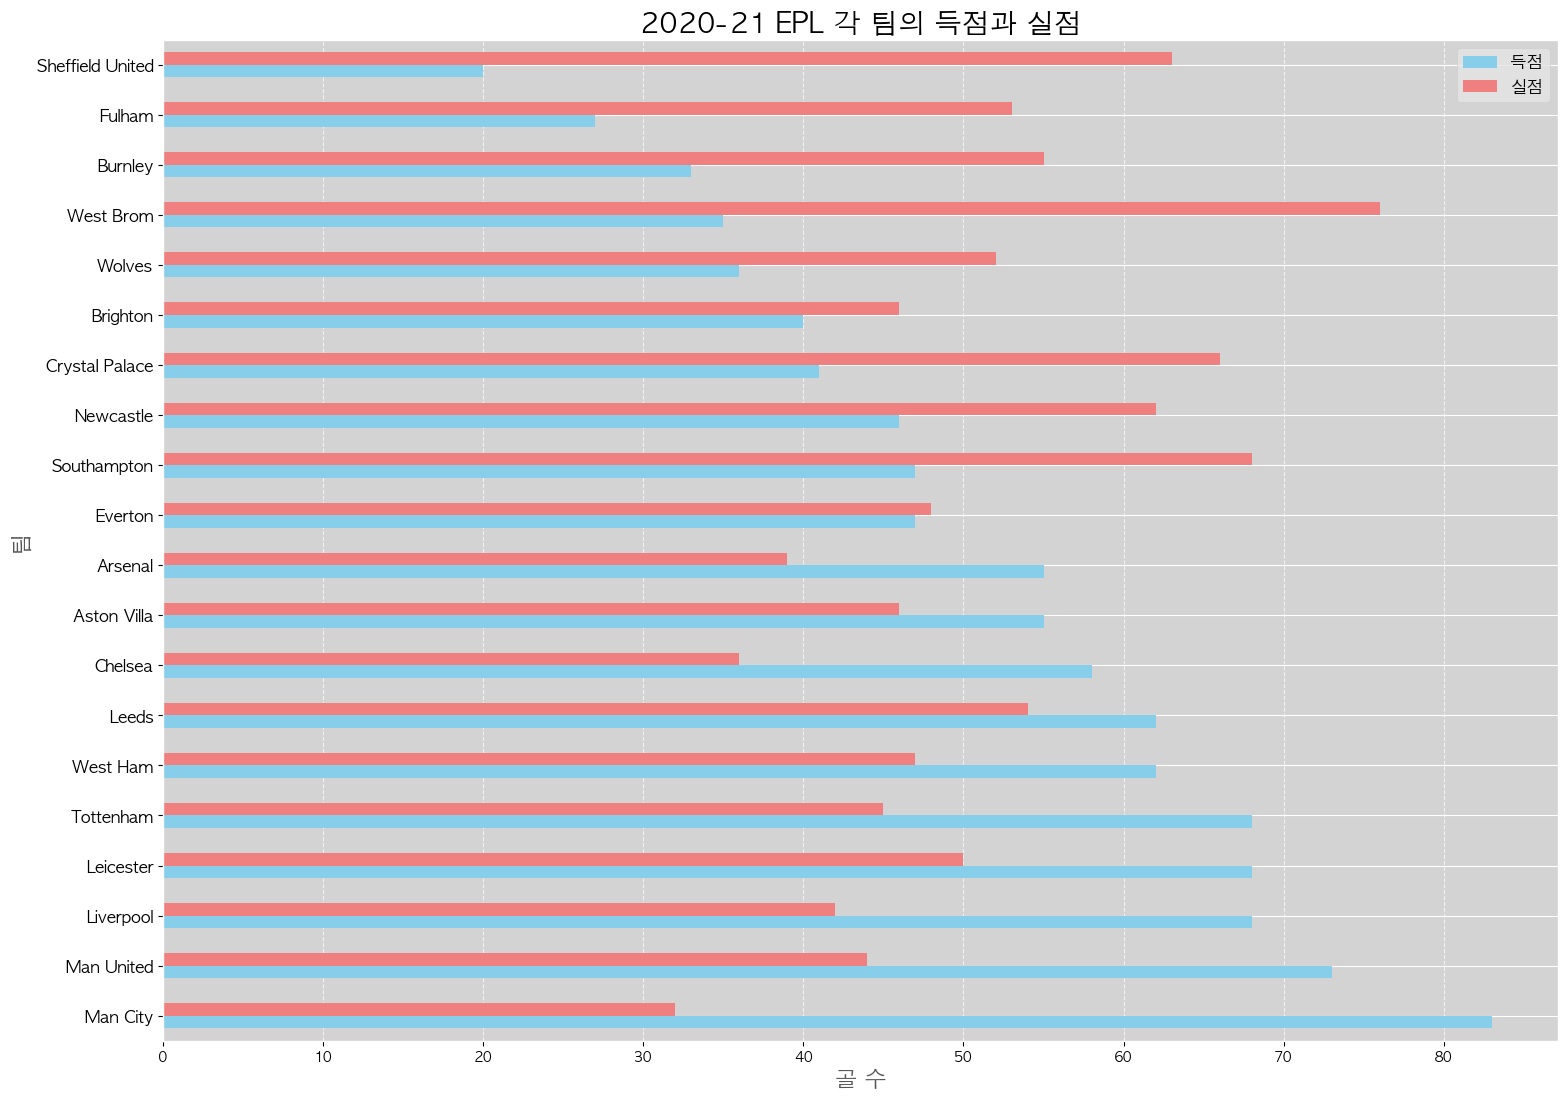

In [170]:
# 시각화 필요 라이브러리 등록
from matplotlib import pyplot as plt

# 그래프 그리기
ax = t_df.plot(kind='barh', x='TEAM', y=["Goal", "Goal_Against"], figsize=(18, 13), color=['skyblue', 'lightcoral'])

# 그래프 제목 설정
plt.title('2020-21 EPL 각 팀의 득점과 실점', fontsize=20)

# x축 레이블 설정
plt.xlabel('골 수', fontsize=16)

# y축 레이블 설정
plt.ylabel('팀', fontsize=16)

# y축 눈금 설정
plt.yticks(fontsize=12)

# 범례 설정
plt.legend(['득점', '실점'], loc='upper right', fontsize=12)

# 그래프 배경색 설정
plt.gca().set_facecolor('lightgray')

# 그리드 표시
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 축 레이블과 눈금 색상 설정
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# 그래프 저장
plt.savefig('EPL_Goal_and_Goal_Against.png', bbox_inches='tight')

# 그래프 출력
plt.show()

In [171]:
# 공격력 - 득점, 슈팅, 유효슈팅
t_goal = 0
t_shot = 0
t_shot_target = 0

# 2020-21 시즌 데이터 및 맨체스터 유나이티드 팀의 경기만 필터링
s_data = EPL_data[EPL_data['Season'] == "2020-21"]
s_data = s_data[(s_data['HomeTeam'] == "Man United") | (s_data['AwayTeam'] == "Man United")]

# 각 경기에서 맨체스터 유나이티드 팀의 득점, 슈팅, 유효슈팅 계산
for index, row in s_data.iterrows():
    if row['HomeTeam'] == "Man United":
        t_goal += row['FTHG']
        t_shot += row['HS']
        t_shot_target += row['HST']
    elif row['AwayTeam'] == "Man United":
        t_goal += row['FTAG']
        t_shot += row['AS']
        t_shot_target += row['AST']

In [172]:
# 수비력 - 실점, 파울, 카드 수 
t_a_g = 0
t_f = 0
t_yellow = 0
t_red = 0

# 2020-21 시즌 데이터 및 맨체스터 유나이티드 팀의 경기만 필터링
s_data=EPL_data.loc[(EPL_data['Season']=="2020-21"),:] 
s_data=s_data.loc[(s_data['HomeTeam']=="Man United")|(s_data['AwayTeam']=="Man United"),:] 

# 각 경기에서 맨체스터 유나이티드 팀의 실점, 파울, 카드 수 계산
for j in s_data.index:
    # 실점
    if s_data['HomeTeam'][j] == "Man United": # 홈팀일 때
        t_a_g += s_data['FTAG'][j]

    elif s_data['AwayTeam'][j]=="Man United": # 어웨이 팀일때    
        t_a_g += s_data['FTHG'][j]
    
    # 파울
    if s_data['HomeTeam'][j] == "Man United": # 홈팀일 때
        t_f += s_data['HF'][j]

    elif s_data['AwayTeam'][j] == "Man United": # 어웨팀일 때
        t_f += s_data['AF'][j]        

    # 경고
    if s_data['HomeTeam'][j] == "Man United": # 홈팀일 때
        t_yellow += s_data['HY'][j]

    elif s_data['AwayTeam'][j] == "Man United": # 어웨팀일 때
        t_yellow += s_data['AY'][j]  
    
    # 퇴장
    if s_data['HomeTeam'][j] == "Man United": # 홈팀일 때
        t_red += s_data['HR'][j]

    elif s_data['AwayTeam'][j] == "Man United": # 어웨팀일 때
        t_red += s_data['AR'][j] 

In [173]:
manU = []  # 맨체스터 유나이티드 통계를 저장할 리스트 초기화

# 맨체스터 유나이티드 통계를 리스트에 추가
manU.append([t_goal, t_shot, t_shot_target, t_a_g, t_f, t_yellow, t_red])

In [174]:
# DF 생성
manU =pd.DataFrame(manU,columns=['Goal','Shoting','Shoting_target','Goal_Against','foul','Y_card','R_card'])

In [175]:
manU

,Goal,Shoting,Shoting_target,Goal_Against,foul,Y_card,R_card
0,73,521.0,212.0,44,452.0,64.0,1.0


----
2. 우승팀들의 승점

In [176]:
# 첫번째 행만 가져오기
s1994 = s_1994[s_1994.index == 1]
s1995 = s_1995[s_1995.index == 1]
s1996 = s_1996[s_1996.index == 1]
s1997 = s_1997[s_1997.index == 1]
s1998 = s_1998[s_1998.index == 1]
s1999 = s_1999[s_1999.index == 1]
s2000 = s_2000[s_2000.index == 1] 

total = pd.concat([s1994, s1995, s1996, s1997, s1998, s1999, s2000, s_2001, s_2002, s_2003, s_2004, s_2005, s_2006, s_2007, s_2008, s_2009, s_2010, s_2011, s_2012, s_2013, s_2014, s_2015, s_2016, s_2017, s_2018, s_2019, s_2020], axis=0)
best_season = total[total.index == 1]

In [177]:
best_season

,TEAM,Point,season
1,Man United,92,1994
1,Blackburn,89,1995
1,Man United,82,1996
1,Man United,75,1997
1,Arsenal,78,1998
1,Man United,79,1999
1,Man United,91,2000
1,Man United,80,2001
1,Arsenal,87,2002
1,Man United,83,2003


In [178]:
# 우승팀 COUNT
best_season['season'].groupby(best_season['TEAM']).count()

TEAM
Arsenal        3
Blackburn      1
Chelsea        5
Leicester      1
Liverpool      1
Man City       3
Man United    13
Name: season, dtype: int64

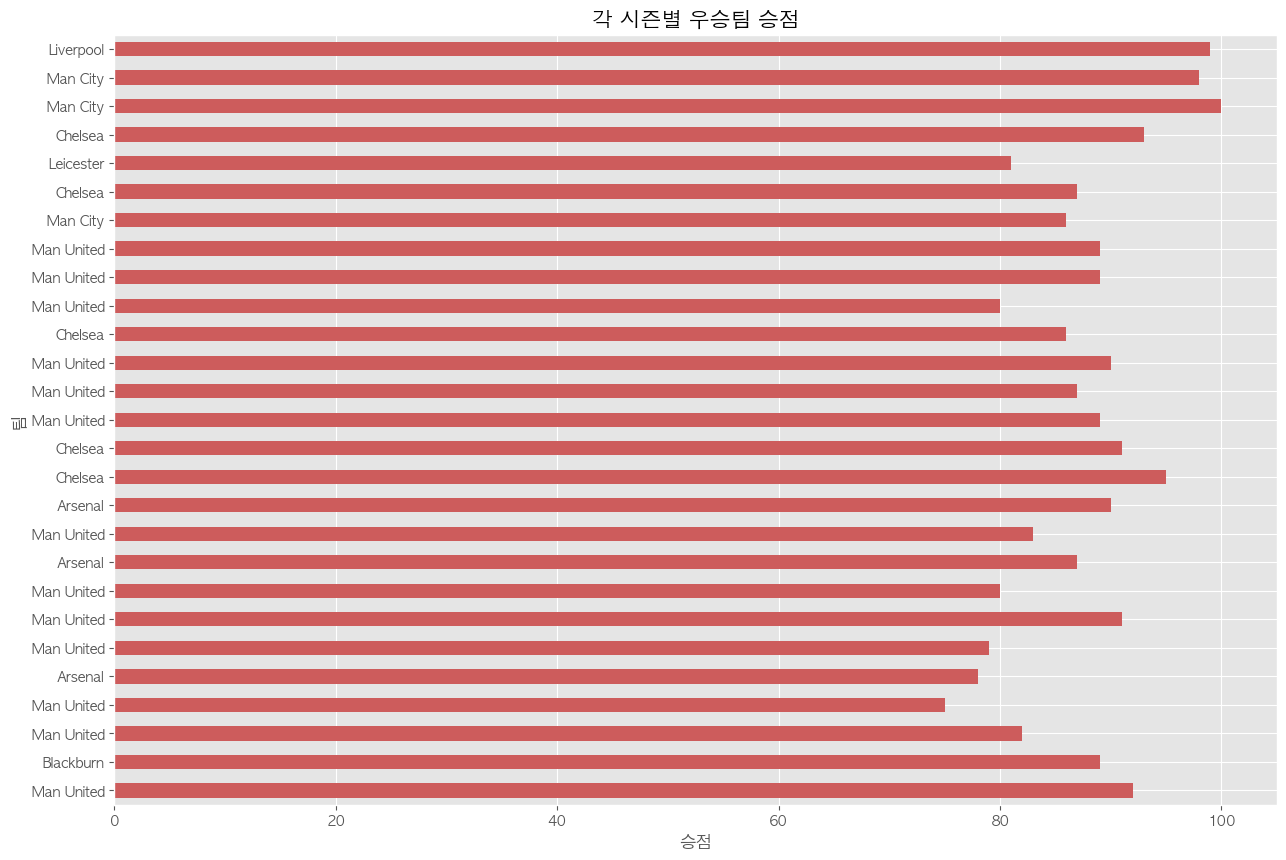

In [179]:
# 스타일 설정
plt.style.use('ggplot')  # 그래프 스타일 설정
plt.rc('font', size=10)  # 폰트 크기 설정

# 그래프 생성
best_season.plot(kind='barh', x='TEAM', y=["Point"], figsize=(15, 10), color='indianred', legend=False)

# 그래프 타이틀과 레이블 설정
plt.title('각 시즌별 우승팀 승점', fontsize=15)
plt.xlabel('승점', fontsize=12)
plt.ylabel('팀', fontsize=12)

# 눈금 크기 설정
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 그래프 표시
plt.show()

In [180]:
# 우승팀 통계량 확인 
best_season['Point'].describe()

count     27.000000
mean      87.629630
std        6.445918
min       75.000000
25%       82.500000
50%       89.000000
75%       91.000000
max      100.000000
Name: Point, dtype: float64

In [181]:
winner = best_season.describe()

----
3. 강등팀들의 승점
- 강등 최소 기준 등수만 모아서 강등 승점이 어떻게 되는지 파악
- 강등은 18위부터 이므로 index == 18로 계산

In [182]:
degrade1=pd.concat([s_1996,s_1997,s_1998,s_1999,s_2000,s_2001,s_2002,s_2003,s_2004,s_2005,s_2006,s_2007,s_2008,s_2009,s_2010,s_2011,s_2012,s_2013,s_2014,s_2015,s_2016,s_2017,s_2018,s_2019,s_2020,], axis=0)
degrade2=s_1994[s_1994.index==20]
degrade3=s_1995[s_1995.index==19]
degrade1=degrade1[degrade1.index==18]
degrade_total=pd.concat([degrade1,degrade2,degrade3],axis=0)
degrade_total=degrade_total.sort_values(by='season',ascending=False)

In [183]:
degrade_total

,TEAM,Point,season
18,Bournemouth,34,2020
18,Cardiff,34,2019
18,Swansea,33,2018
18,Hull,34,2017
18,Newcastle,37,2016
18,Hull,35,2015
18,Norwich,33,2014
18,Wigan,36,2013
18,Bolton,36,2012
18,Blackpool,39,2011


In [184]:
# 강등팀 COUNT
degrade_total['season'].groupby(degrade_total['TEAM']).count()

TEAM
Birmingham          1
Blackpool           1
Bolton              1
Bournemouth         1
Cardiff             1
Charlton            1
Coventry            1
Crystal Palace      2
Everton             1
Fulham              1
Hull                3
Ipswich             1
Leeds               1
Man City            1
Newcastle           2
Norwich             1
Sheffield United    1
Southampton         1
Swansea             1
West Ham            1
Wigan               2
Wimbledon           1
Name: season, dtype: int64

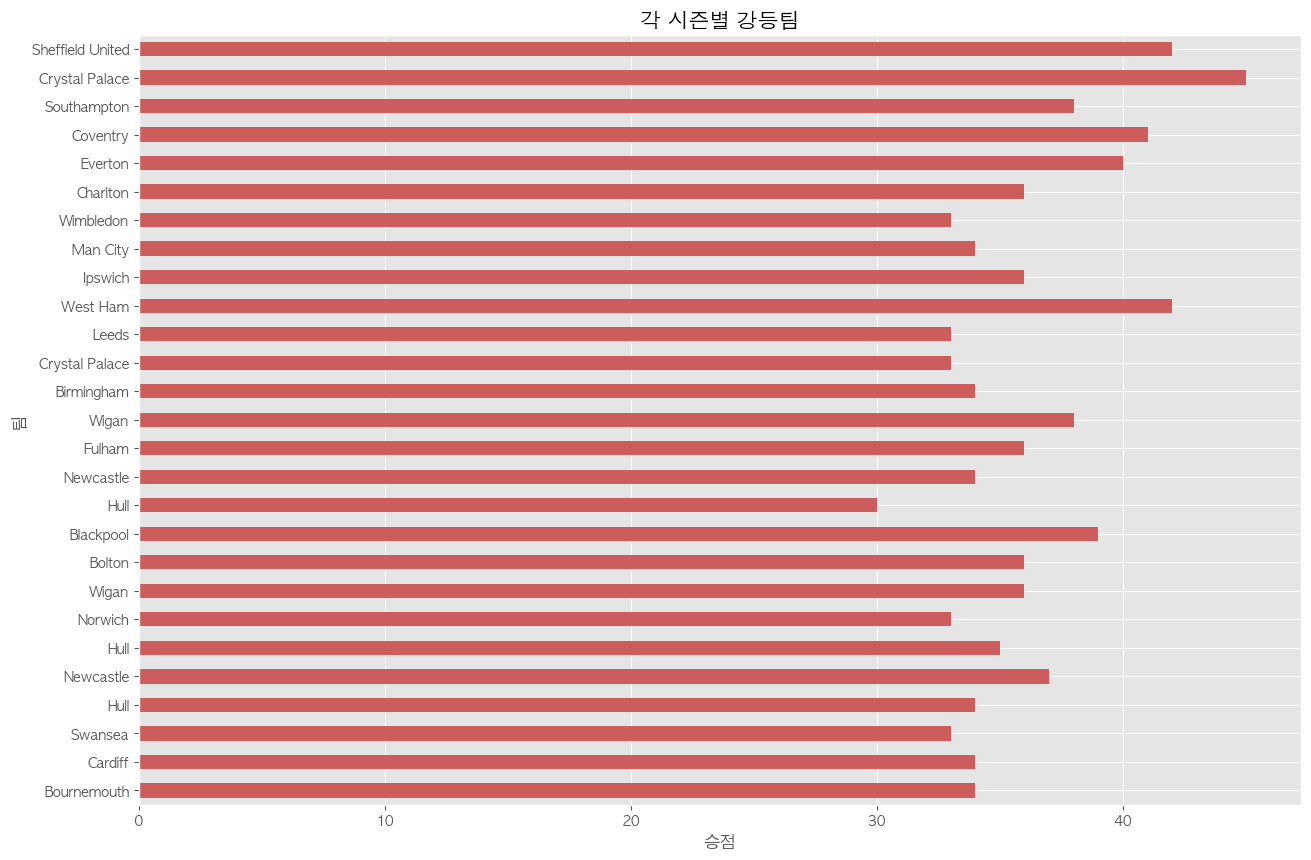

In [185]:
# 그래프 생성
degrade_total.plot(kind='barh', x='TEAM', y=["Point"], figsize=(15, 10), color='indianred', legend=False)

# 그래프 타이틀과 레이블 설정
plt.title('각 시즌별 강등팀', fontsize=15)
plt.xlabel('승점', fontsize=12)
plt.ylabel('팀', fontsize=12)

# 눈금 크기 설정
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 그래프 표시
plt.show()

In [186]:
# 강등팀 통계량 확인 
degrade_total.loc[:,['Point']].describe()

,Point
count,27.000000
mean,36.148148
std,3.493992
min,30.000000
25%,34.000000
50%,36.000000
75%,38.000000
max,45.000000


In [187]:
degrade = degrade_total.loc[:,['Point']].describe()

----
4. 우승하는 팀들의 공통점

1) 우승팀의 공격 - 득점 (1993-94 시즌부터)

In [188]:
best_team = list(best_season['TEAM'])  # 각 시즌별 우승팀 목록
count = 1994  # 시작 시즌

# 가장 좋은 시즌을 보여준 팀들에 대해 시즌별 득점을 계산하고 데이터프레임 생성
for s, t in zip(season, best_team):
    b_goal = {}  # 시즌별 득점을 저장할 딕셔너리 초기화
    
    # 해당 시즌의 데이터만 추출
    s_data = EPL_data.loc[(EPL_data['Season'] == s), :] 
    s_data = s_data.loc[(s_data['HomeTeam'] == t) | (s_data['AwayTeam'] == t), :]
    
    # 해당 팀이 진행한 모든 경기에 대해 득점 계산
    for j in s_data.index:
        # 홈팀일 때
        if s_data['HomeTeam'][j] == t:
            if s_data['HomeTeam'][j] in b_goal:  # 홈팀에서 골 
                b_goal[s_data['HomeTeam'][j]] += s_data['FTHG'][j]
            else:
                b_goal[s_data['HomeTeam'][j]] = s_data['FTHG'][j]
        # 어웨이 팀일 때
        elif s_data['AwayTeam'][j] == t:
            if s_data['AwayTeam'][j] in b_goal:  # 어웨이팀에서 골 
                b_goal[s_data['AwayTeam'][j]] += s_data['FTAG'][j]
            else:
                b_goal[s_data['AwayTeam'][j]] = s_data['FTAG'][j]

    # 득점 데이터프레임 생성 및 시즌 정보 추가
    df = pd.DataFrame(list(b_goal.items()), columns=['TEAM', 'Goal'])     
    df["season"] = count
    globals()["b_" + str(count)] = df  # 동적으로 데이터프레임 이름 생성
    
    count += 1  # 다음 시즌으로 넘어감

In [189]:
b_t=pd.concat([b_1994,b_1995,b_1996,b_1997,b_1998,b_1999,b_2000,b_2001,b_2002,b_2003,b_2004,b_2005,b_2006,b_2007,b_2008,b_2009,b_2010,b_2011,b_2012,b_2013,b_2014,b_2015,b_2016,b_2017,b_2018,b_2019,b_2020,], axis=0)

In [190]:
# 각 시즌별 우승팀 득점수
b_t

,TEAM,Goal,season
0,Man United,80,1994
0,Blackburn,80,1995
0,Man United,73,1996
0,Man United,76,1997
0,Arsenal,68,1998
0,Man United,80,1999
0,Man United,97,2000
0,Man United,79,2001
0,Arsenal,79,2002
0,Man United,74,2003


1) 공격 - 슈팅, 유효슈팅 (2000-01 시즌부터) # 데이터 유실 이슈

In [191]:
# 2000-01 시즌으로 리스트 초기화
season=season[7:]

In [192]:
best_team = best_team[7:]

In [193]:
# 슈팅
# 유효슈팅
best_team=list(best_season['TEAM'])
count =2001

for s,t in zip(season,best_team):
    b_shot = {}
    b_shot_target = {}
    
    s_data=EPL_data.loc[(EPL_data['Season']==s),:] 
    s_data=s_data.loc[(s_data['HomeTeam']==t)|(s_data['AwayTeam']==t),:] 

    for j in s_data.index:
        #슈팅
        if s_data['HomeTeam'][j] == t: # 홈팀일 때
            if s_data['HomeTeam'][j] in b_shot: # 홈팀에서 슈팅 
                b_shot[s_data['HomeTeam'][j]] = b_shot[s_data['HomeTeam'][j]]+ s_data['HS'][j]
            else:
                b_shot[s_data['HomeTeam'][j]] = s_data['HS'][j]

        elif s_data['AwayTeam'][j] == t: # 어웨팀일 때
            if s_data['AwayTeam'][j] in b_shot: # 홈팀에서 슈팅 
                b_shot[s_data['AwayTeam'][j]] = b_shot[s_data['AwayTeam'][j]]+ s_data['AS'][j]
            else:
                b_shot[s_data['AwayTeam'][j]] = s_data['AS'][j]        
       
        # 유효슈팅
        if s_data['HomeTeam'][j] == t: # 홈팀일 때
            if s_data['HomeTeam'][j] in b_shot_target: # 홈팀에서 슈팅 
                b_shot_target[s_data['HomeTeam'][j]] = b_shot_target[s_data['HomeTeam'][j]]+ s_data['HST'][j]
            else:
                b_shot_target[s_data['HomeTeam'][j]] = s_data['HST'][j]

        elif s_data['AwayTeam'][j] == t: # 어웨팀일 때
            if s_data['AwayTeam'][j] in b_shot_target: # 홈팀에서 슈팅 
                b_shot_target[s_data['AwayTeam'][j]] = b_shot_target[s_data['AwayTeam'][j]]+ s_data['AST'][j]
            else:
                b_shot_target[s_data['AwayTeam'][j]] = s_data['AST'][j]   
        
    df = pd.DataFrame(list(b_shot.items()), columns=['TEAM', 'Shot'])   
    df_f = pd.DataFrame(list(b_shot_target.items()), columns=['TEAM', 'Shot_target'])  
    t_df = pd.merge(df,df_f,on='TEAM')
                
    t_df["season"] = count
    globals()["b_s_"+str(count)] = t_df
    
    count += 1

In [201]:
b_t_s=pd.concat([b_s_2001,b_s_2002,b_s_2003,b_s_2004,b_s_2005,b_s_2006,b_s_2007,b_s_2008,b_s_2009,b_s_2010,b_s_2011,b_s_2012,b_s_2013,b_s_2014,b_s_2015,b_s_2016,b_s_2017,b_s_2018,b_s_2019,b_s_2020], axis=0)

In [202]:
# 최종 합치기
best_team_shoting=pd.merge(b_t,b_t_s,how='outer',on='season')

In [203]:
# 필요없는 열 삭제
best_team_shoting = best_team_shoting.drop(['TEAM_y'],axis=1)

In [205]:
best_team_shoting

,TEAM_x,Goal,season,Shot,Shot_target
0,Man United,80,1994,NaN,NaN
1,Blackburn,80,1995,NaN,NaN
2,Man United,73,1996,NaN,NaN
3,Man United,76,1997,NaN,NaN
4,Arsenal,68,1998,NaN,NaN
5,Man United,80,1999,NaN,NaN
6,Man United,97,2000,NaN,NaN
7,Man United,79,2001,556.0,264.0
8,Arsenal,79,2002,442.0,213.0
9,Man United,74,2003,531.0,308.0


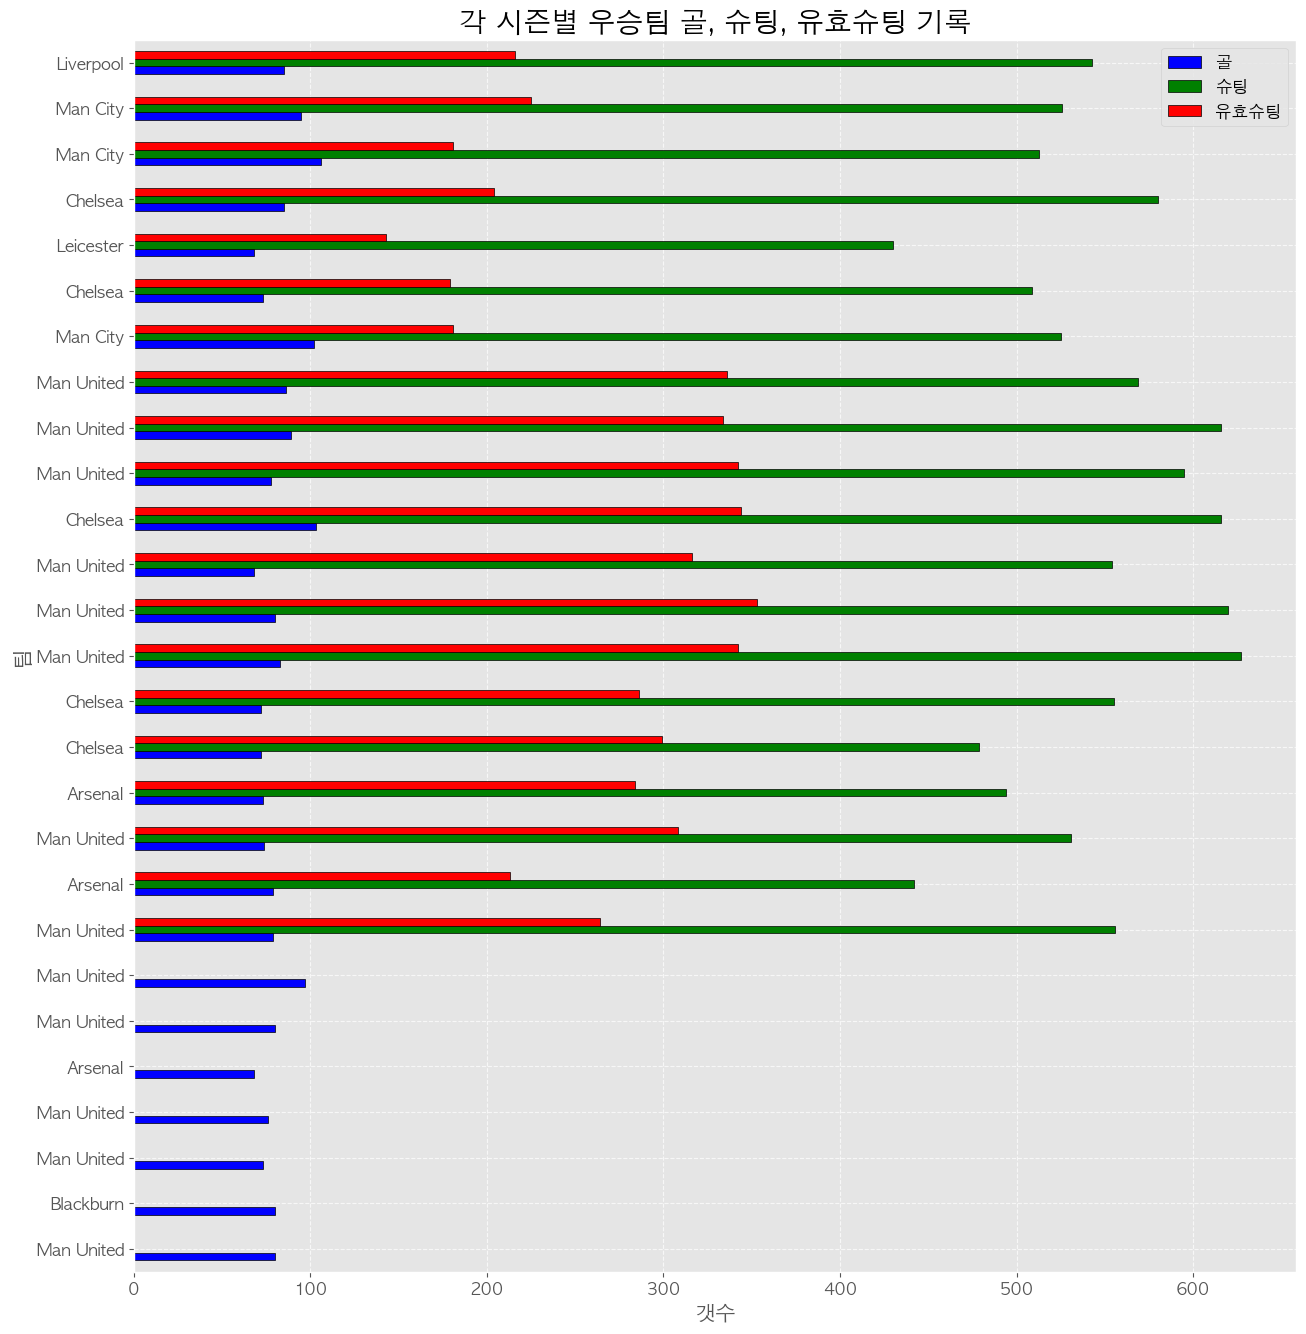

In [207]:
# 그래프 생성 및 스타일 지정
best_team_shoting.plot(kind='barh', x='TEAM_x', y=["Goal","Shot","Shot_target"], figsize=(15,16), color=['blue', 'green', 'red'], edgecolor='black')

# 제목과 축 레이블 추가
plt.title('각 시즌별 우승팀 골, 슈팅, 유효슈팅 기록', fontsize=20)
plt.xlabel('갯수', fontsize=15)
plt.ylabel('팀', fontsize=15)

# 축 눈금 및 레이블 크기 지정
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 범례 추가
plt.legend(['골', '슈팅', '유효슈팅'], fontsize=12)

# 그리드 추가
plt.grid(True, linestyle='--', alpha=0.7)

# 그래프 보여주기
plt.show()

In [208]:
# 우승팀의 공격 통계치 확인
best_team_shoting.loc[:,['Goal','Shot','Shot_target']].describe()

,Goal,Shot,Shot_target
count,27.000000,20.000000,20.000000
mean,81.629630,544.000000,267.500000
std,10.870384,56.701434,68.343944
min,68.000000,430.000000,143.000000
25%,73.000000,512.000000,210.750000
50%,80.000000,548.500000,285.000000
75%,85.500000,583.750000,334.500000
max,106.000000,627.000000,353.000000


In [209]:
goal=best_team_shoting.loc[:,['Goal','Shot','Shot_target']].describe()

------
2) 우승팀의 수비 - 실점

In [210]:
season=list(EPL_data['Season'].unique())
best_team=list(best_season['TEAM'])

In [211]:
count = 1994  # 시즌 초기값 설정

# 각 시즌에 대해 반복
for s, t in zip(season, best_team):
    b_aga = {}  # 각 시즌에 대한 팀별 실점 저장을 위한 빈 딕셔너리 생성
    s_data = EPL_data.loc[(EPL_data['Season'] == s), :]  # 해당 시즌 데이터 선택
    s_data = s_data.loc[(s_data['HomeTeam'] == t) | (s_data['AwayTeam'] == t), :]  # 해당 팀의 경기 선택

    # 해당 팀의 경기에 대해 반복
    for j in s_data.index:
        # 홈팀일 때
        if s_data['HomeTeam'][j] == t:
            if s_data['HomeTeam'][j] in b_aga:  # 이미 딕셔너리에 존재하는 팀일 경우
                b_aga[s_data['HomeTeam'][j]] += s_data['FTAG'][j]  # 홈에서의 실점 누적
            else:  # 딕셔너리에 존재하지 않는 팀일 경우
                b_aga[s_data['HomeTeam'][j]] = s_data['FTAG'][j]  # 실점 기록
        # 어웨이 팀일 때
        elif s_data['AwayTeam'][j] == t:
            if s_data['AwayTeam'][j] in b_aga:  # 이미 딕셔너리에 존재하는 팀일 경우
                b_aga[s_data['AwayTeam'][j]] += s_data['FTHG'][j]  # 어웨이에서의 실점 누적
            else:  # 딕셔너리에 존재하지 않는 팀일 경우
                b_aga[s_data['AwayTeam'][j]] = s_data['FTHG'][j]  # 실점 기록

    # 팀별 실점을 데이터프레임에 저장하고 시즌 정보 추가
    df = pd.DataFrame(list(b_aga.items()), columns=['TEAM', 'Goal_Against'])
    df["season"] = count
    globals()["b_a_" + str(count)] = df  # 전역 변수로 데이터프레임 저장

    count += 1  # 시즌 카운트 증가

In [212]:
b_t_a=pd.concat([b_a_1994,b_a_1995,b_a_1996,b_a_1997,b_a_1998,b_a_1999,b_a_2000,b_a_2001,b_a_2002,b_a_2003,b_a_2004,b_a_2005,b_a_2006,b_a_2007,b_a_2008,b_a_2009,b_a_2010,b_a_2011,b_a_2012,b_a_2013,b_a_2014,b_a_2015,b_a_2016,b_a_2017,b_a_2018,b_a_2019,b_a_2020,], axis=0)

In [213]:
# 실점
b_t_a

,TEAM,Goal_Against,season
0,Man United,38,1994
0,Blackburn,39,1995
0,Man United,35,1996
0,Man United,44,1997
0,Arsenal,33,1998
0,Man United,37,1999
0,Man United,45,2000
0,Man United,31,2001
0,Arsenal,36,2002
0,Man United,34,2003


2) 수비 - 파울, 카드 수 (2000-01 시즌부터) # 데이터 소실

In [214]:
season=list(EPL_data['Season'].unique())
best_team=list(best_season['TEAM'])

In [215]:
# 파울
# 카드 수 (옐로, 레드)

best_team=list(best_season['TEAM'])
best_team = best_team[7:]
season = season[7:]
count =2001

# 시즌 및 팀별로 반복
for s, t in zip(season, best_team):
    # 해당 시즌 및 특정 팀의 데이터 선택
    b_foul = {}
    b_y_card = {}
    b_r_card = {}
    
    s_data=EPL_data.loc[(EPL_data['Season']==s),:] 
    s_data=s_data.loc[(s_data['HomeTeam']==t)|(s_data['AwayTeam']==t),:] 

    for j in s_data.index:
        #파울 
        if s_data['HomeTeam'][j] == t: # 홈팀일 때
            if s_data['HomeTeam'][j] in b_foul: # 홈에서 파울
                b_foul[s_data['HomeTeam'][j]] = b_foul[s_data['HomeTeam'][j]]+ s_data['HF'][j]
            else:
                b_foul[s_data['HomeTeam'][j]] = s_data['HF'][j]

        elif s_data['AwayTeam'][j] == t: # 어웨팀일 때
            if s_data['AwayTeam'][j] in b_foul: # 어웨이일 때 파울
                b_foul[s_data['AwayTeam'][j]] = b_foul[s_data['AwayTeam'][j]]+ s_data['AF'][j]
            else:
                b_foul[s_data['AwayTeam'][j]] = s_data['AF'][j]        
       
        # 옐로 카드
        if s_data['HomeTeam'][j] == t: # 홈팀일 때
            if s_data['HomeTeam'][j] in b_y_card: # 홈에서 옐로 카드 
                b_y_card[s_data['HomeTeam'][j]] = b_y_card[s_data['HomeTeam'][j]]+ s_data['HY'][j]
            else:
                b_y_card[s_data['HomeTeam'][j]] = s_data['HY'][j]

        elif s_data['AwayTeam'][j] == t: # 어웨팀일 때
            if s_data['AwayTeam'][j] in b_y_card: # 어웨이일 때 옐로 카드
                b_y_card[s_data['AwayTeam'][j]] = b_y_card[s_data['AwayTeam'][j]]+ s_data['AY'][j]
            else:
                b_y_card[s_data['AwayTeam'][j]] = s_data['AY'][j]   
        
        # 레드 카드
        if s_data['HomeTeam'][j] == t: # 홈팀일 때
            if s_data['HomeTeam'][j] in b_r_card: # 홈에서 레드 카드
                b_r_card[s_data['HomeTeam'][j]] = b_r_card[s_data['HomeTeam'][j]]+ s_data['HR'][j]
            else:
                b_r_card[s_data['HomeTeam'][j]] = s_data['HR'][j]

        elif s_data['AwayTeam'][j] == t: # 어웨팀일 때
            if s_data['AwayTeam'][j] in b_r_card: # 어웨이일 때 레드 카드
                b_r_card[s_data['AwayTeam'][j]] = b_r_card[s_data['AwayTeam'][j]]+ s_data['AR'][j]
            else:
                b_r_card[s_data['AwayTeam'][j]] = s_data['AR'][j]   
    
    
    # 데이터프레임으로 변환
    df_1 = pd.DataFrame(list(b_foul.items()), columns=['TEAM', 'foul']) # 파울
    df_2 = pd.DataFrame(list(b_y_card.items()), columns=['TEAM', 'yellow_card']) # 옐로 카드     
    df_3 = pd.DataFrame(list(b_r_card.items()), columns=['TEAM', 'red_card']) # 레드카드

    # 각 데이터프레임을 병합
    df_1 = pd.merge(df_1,df_2,on='TEAM')
    df_de = pd.merge(df_1,df_3,on='TEAM')
    
    # 시즌 정보 추가        
    df_de["season"] = count
    globals()["b_f_"+str(count)] = df_de
    
    count += 1 # 시즌 카운트 증가

In [216]:
b_foul=pd.concat([b_f_2001,b_f_2002,b_f_2003,b_f_2004,b_f_2005,b_f_2006,b_f_2007,b_f_2008,b_f_2009,b_f_2010,b_f_2011,b_f_2012,b_f_2013,b_f_2014,b_f_2015,b_f_2016,b_f_2017,b_f_2018,b_f_2019,b_f_2020], axis=0)

In [217]:
best_team_defence=pd.merge(b_t_a,b_foul,how='outer',on='season')
# 필요없는 열 삭제
best_team_defence = best_team_defence.drop(['TEAM_y'],axis=1)

In [218]:
best_team_defence

,TEAM_x,Goal_Against,season,foul,yellow_card,red_card
0,Man United,38,1994,NaN,NaN,NaN
1,Blackburn,39,1995,NaN,NaN,NaN
2,Man United,35,1996,NaN,NaN,NaN
3,Man United,44,1997,NaN,NaN,NaN
4,Arsenal,33,1998,NaN,NaN,NaN
5,Man United,37,1999,NaN,NaN,NaN
6,Man United,45,2000,NaN,NaN,NaN
7,Man United,31,2001,433.0,44.0,3.0
8,Arsenal,36,2002,561.0,77.0,6.0
9,Man United,34,2003,432.0,45.0,1.0


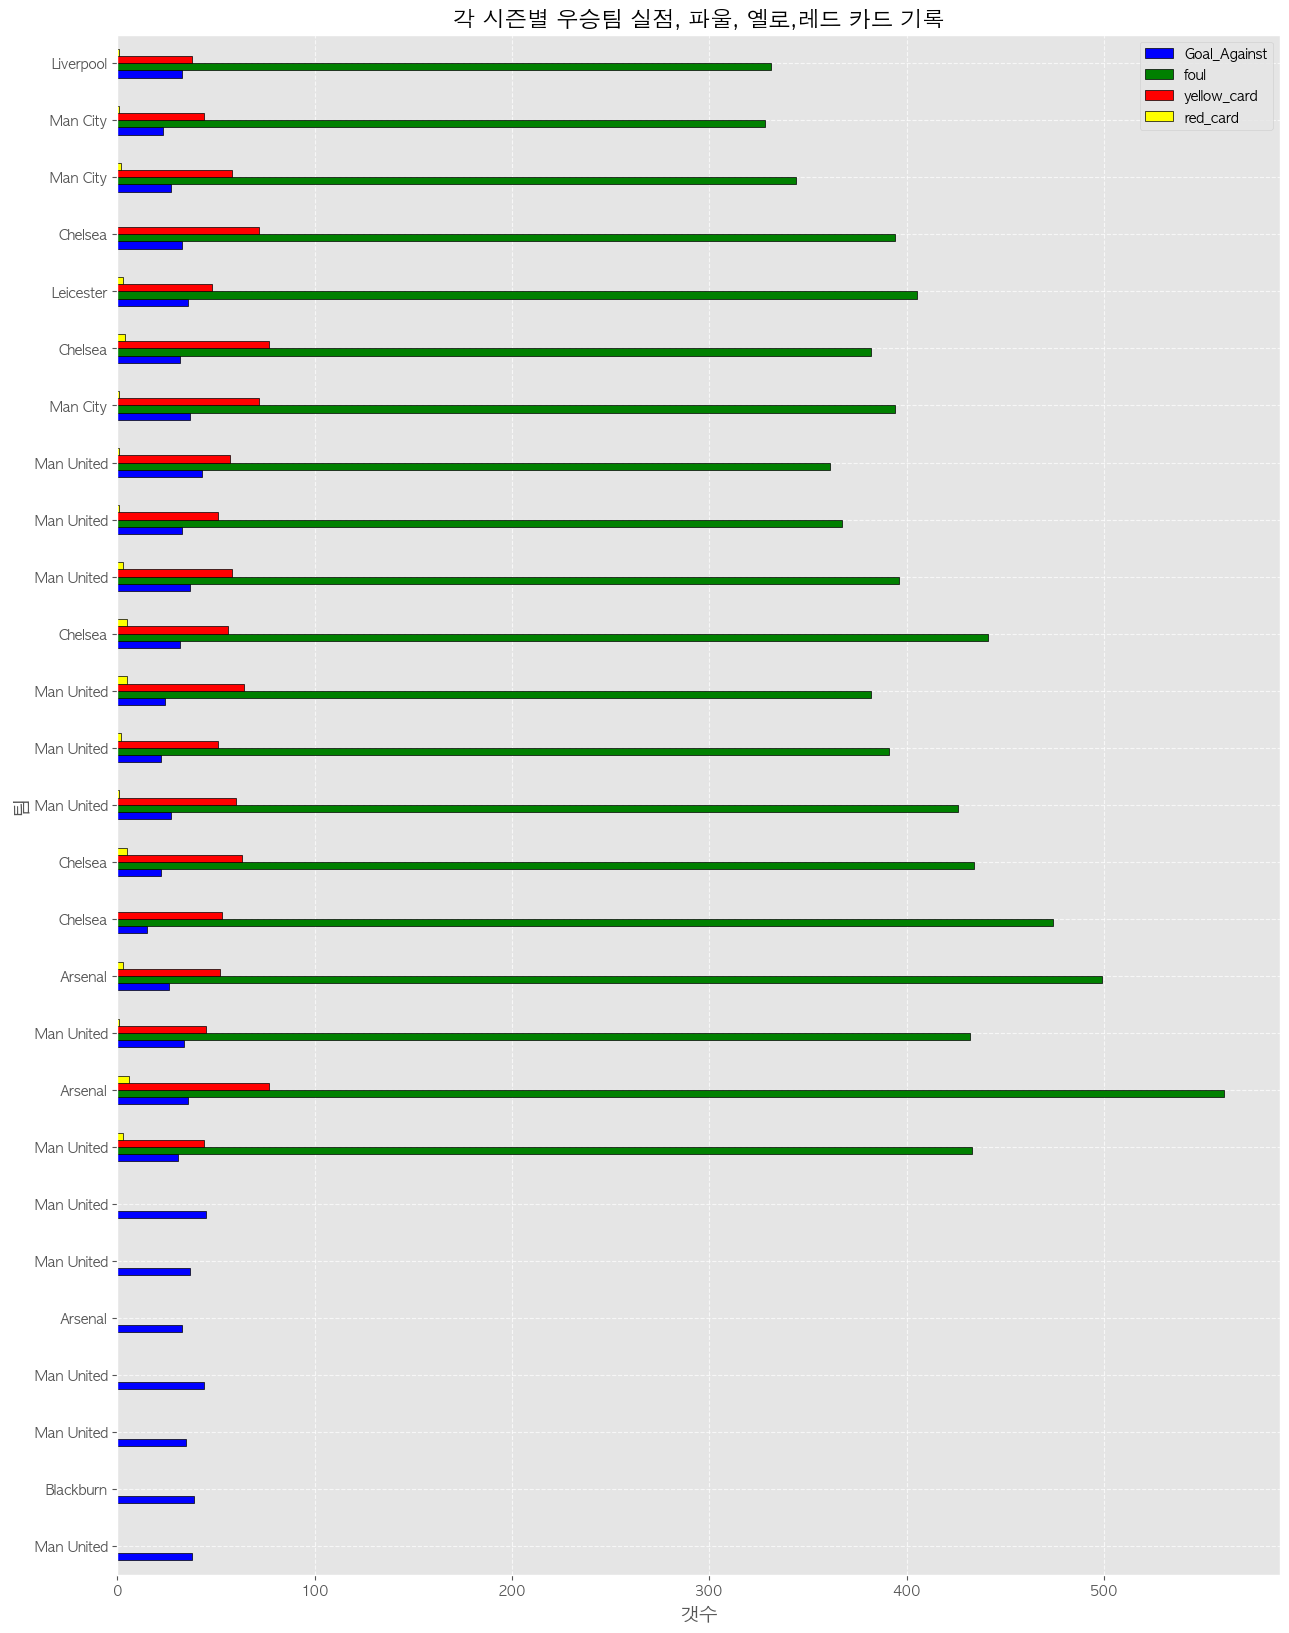

In [225]:
# 표 그리기
ax = best_team_defence.plot(kind='barh', x='TEAM_x', y=["Goal_Against", "foul", "yellow_card", "red_card"], figsize=(15, 20), legend=True, color=['blue', 'green', 'red', 'yellow'], edgecolor='black')

# 축 레이블 및 제목 설정
plt.xlabel('갯수', fontsize=14)
plt.ylabel('팀', fontsize=14)
plt.title('각 시즌별 우승팀 실점, 파울, 옐로,레드 카드 기록', fontsize=16)

# 범례 위치 설정
plt.legend(loc='upper right')

# 그리드 표시 설정
plt.grid(True, linestyle='--', alpha=0.7)

# 표 표시
plt.show()

In [226]:
# 우승팀의 수비 통계치 확인
best_team_defence.loc[:,["Goal_Against","foul","yellow_card","red_card"]].describe()

,Goal_Against,foul,yellow_card,red_card
count,27.000000,20.000000,20.000000,20.000000
mean,32.370370,408.750000,57.000000,2.400000
std,7.233194,57.043727,11.201504,1.818038
min,15.000000,328.000000,38.000000,0.000000
25%,27.000000,378.250000,50.250000,1.000000
50%,33.000000,395.000000,56.500000,2.000000
75%,37.000000,433.250000,63.250000,3.250000
max,45.000000,561.000000,77.000000,6.000000


In [227]:
defence=best_team_defence.loc[:,["Goal_Against","foul","yellow_card","red_card"]].describe()

----
5. 결론
38라운드 기준

In [228]:
# 우승팀의 승점 
win

,Point,season
count,27.000000,27.000000
mean,87.629630,2007.000000
std,6.445918,7.937254
min,75.000000,1994.000000
25%,82.500000,2000.500000
50%,89.000000,2007.000000
75%,91.000000,2013.500000
max,100.000000,2020.000000


#### 우승하기 위해서는 최소 75포인트가 이상이 필요하고
#### 평균값과 중앙값이 87,89인 것으로 보아 88포인트 정도는 되어야 안정적으로 우승이 가능하다는 것을 알 수있다.

In [230]:
# 강등팀의 승점 
degrade

,Point
count,27.000000
mean,36.148148
std,3.493992
min,30.000000
25%,34.000000
50%,36.000000
75%,38.000000
max,45.000000


##### 강등은 평균값과 중앙값은 36으로 38라운드 기준 36포인트이면 강등이라고 볼 수 있다.

In [231]:
# 우승팀의 공격력 
goal/38

,Goal,Shot,Shot_target
count,0.710526,0.526316,0.526316
mean,2.148148,14.315789,7.039474
std,0.286063,1.492143,1.798525
min,1.789474,11.315789,3.763158
25%,1.921053,13.473684,5.546053
50%,2.105263,14.434211,7.500000
75%,2.250000,15.361842,8.802632
max,2.789474,16.500000,9.289474


#### 평균을 경기수로 나누어 보았을 때 
##### 경기당 = goal : 2골 / 슈팅 : 14번 / 유효슈팅 : 7번 (약 50%의 정확도를 가지고 있다.)

In [244]:
# 우승팀의 수비력
defence/38

,Goal_Against,foul,yellow_card,red_card
count,0.710526,0.526316,0.526316,0.526316
mean,0.851852,10.756579,1.500000,0.063158
std,0.190347,1.501151,0.294776,0.047843
min,0.394737,8.631579,1.000000,0.000000
25%,0.710526,9.953947,1.322368,0.026316
50%,0.868421,10.394737,1.486842,0.052632
75%,0.973684,11.401316,1.664474,0.085526
max,1.184211,14.763158,2.026316,0.157895


#### 이것도 평균을 경기수로 나누어 보았을 때
#### 경기당 = 실점 : 0.8골 / 파울:  10.7번 / 옐로카드 : 1.5번 / 레드카드 : 0.06번

우승팀의 공격력,수비력과 맨유와 비교해 보았을 때
공격력은 평균보다 높거나 비슷하나 수비력의 실점과 파울, 옐로의 차이를 볼 수 있다.

----
mancity

In [233]:
# 공격력 계산을 위한 변수 초기화
manCity_goal = 0  # 득점
manCity_shot = 0  # 슈팅
manCity_shot_target = 0  # 유효슈팅

# 2020-21 시즌 데이터에서 맨체스터 시티의 경기만 필터링하여 가져옴
s_data=EPL_data.loc[(EPL_data['Season']=="2020-21"),:] 
s_data=s_data.loc[(s_data['HomeTeam']=="Man City")|(s_data['AwayTeam']=="Man City"),:] 

for j in s_data.index:
    # 득점
    if s_data['HomeTeam'][j] == "Man City": # 홈팀일 때
        manCity_goal += s_data['FTHG'][j]

    elif s_data['AwayTeam'][j]=="Man City": # 어웨이 팀일때    
        manCity_goal += s_data['FTAG'][j]
    
    #슈팅
    if s_data['HomeTeam'][j] == "Man City": # 홈팀일 때
        manCity_shot += s_data['HS'][j]

    elif s_data['AwayTeam'][j] == "Man City": # 어웨팀일 때
        manCity_shot += s_data['AS'][j]        

    # 유효슈팅
    if s_data['HomeTeam'][j] == "Man City": # 홈팀일 때
        manCity_shot_target += s_data['HST'][j]

    elif s_data['AwayTeam'][j] == "Man City": # 어웨팀일 때
        manCity_shot_target += s_data['AST'][j]  

In [234]:
# 수비력 - 실점, 파울, 카드 수 
manCity_a_g = 0 # 실점
manCity_f = 0 # 파울
manCity_yellow = 0 # 옐로카드
manCity_red = 0 # 레드카드

# 2020-21 시즌 데이터에서 맨체스터 시티의 경기만 필터링하여 가져옴
s_data=EPL_data.loc[(EPL_data['Season']=="2020-21"),:] 
s_data=s_data.loc[(s_data['HomeTeam']=="Man City")|(s_data['AwayTeam']=="Man City"),:] 

for j in s_data.index:
    # 실점
    if s_data['HomeTeam'][j] == "Man City": # 홈팀일 때
        manCity_a_g += s_data['FTAG'][j]

    elif s_data['AwayTeam'][j]=="Man City": # 어웨이 팀일때    
        manCity_a_g += s_data['FTHG'][j]
    
    # 파울
    if s_data['HomeTeam'][j] == "Man City": # 홈팀일 때
        manCity_f += s_data['HF'][j]

    elif s_data['AwayTeam'][j] == "Man City": # 어웨팀일 때
        manCity_f += s_data['AF'][j]        

    # 경고
    if s_data['HomeTeam'][j] == "Man City": # 홈팀일 때
        manCity_yellow += s_data['HY'][j]

    elif s_data['AwayTeam'][j] == "Man City": # 어웨팀일 때
        manCity_yellow += s_data['AY'][j]  
    
    # 퇴장
    if s_data['HomeTeam'][j] == "Man City": # 홈팀일 때
        manCity_red += s_data['HR'][j]

    elif s_data['AwayTeam'][j] == "Man City": # 어웨팀일 때
        manCity_red += s_data['AR'][j] 

In [235]:
manCity = []
manCity.append([manCity_goal,manCity_shot,manCity_shot_target,manCity_a_g,manCity_f,manCity_yellow,manCity_red])

In [236]:
manCity =pd.DataFrame(manCity,columns=['Goal','Shoting','Shoting_target','Goal_Against','foul','Y_card','R_card'])

In [237]:
manCity

,Goal,Shoting,Shoting_target,Goal_Against,foul,Y_card,R_card
0,83,604.0,219.0,32,361.0,46.0,2.0


In [242]:
manCity / 30

,Goal,Shoting,Shoting_target,Goal_Against,foul,Y_card,R_card
0,2.766667,20.133333,7.3,1.066667,12.033333,1.533333,0.066667


In [243]:
manU / 30

,Goal,Shoting,Shoting_target,Goal_Against,foul,Y_card,R_card
0,2.433333,17.366667,7.066667,1.466667,15.066667,2.133333,0.033333


#### 2021/04/05 30라운드 기준으로 맨유는 우승팀의 공격 평균치보다 높은것을 알수있다.
#### 하지만 수비(실점, 옐로카드) 평균치가 높아 현재 1위를 달리는 맨시티보다 한단계 낮은 순위에 랭크 되어있다.
- 현재 30R 
1. 맨시티 승점 76
2. 맨유 승점 69
#### 현재 1위 맨시티는 우승팀의 공격, 수비 평균치가 모두 앞서있다.
#### 수비력이 약간 부족하지만, 아직 7경기나 남아있어서 충분히 따라잡을 수 있는 수치이다. 공격력은 1위 맨시티와 우승경쟁하기 충분한 공격력이라는 것을 보여준다.